In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist    # Keras importa la base de datos MNIST
from keras.models import Sequential # Sequential sirve para declarar modelos neuronales
from keras.layers.core import Dense, Dropout, Activation # Funciones para declarar capas neuronales específicas 
from keras.utils import np_utils    # np_utils sirve para crear los vectores objetivo
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


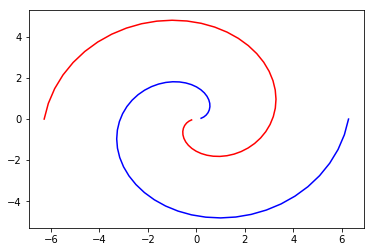

In [2]:
Npoints = 50
theta = np.linspace(0.2,2*np.pi,Npoints)
rho = theta
x1 = rho*np.cos(theta)
x2 = rho*np.sin(theta)

y1 = rho*np.cos(theta+np.pi)
y2 = rho*np.sin(theta+np.pi)

plt.plot(x1,x2,'b',y1,y2,'r')
plt.show()

Xblue = np.vstack((x1,x2)).T
Xred = np.vstack((y1,y2)).T
X = np.vstack((Xblue,Xred))

yblue = np.ones(Npoints)
yred = np.zeros(Npoints)
Y = np.hstack((yblue,yred))


In [55]:
# Mostrar que pasa si Numero neuronas ocultas 1,5,10,100,1000,10000
tlp = Sequential()
tlp.add(Dense(100, use_bias=True, activation='tanh', input_shape=(2,)))
tlp.add(Dense(1, use_bias=True, activation='sigmoid'))

model = tlp
adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
h = model.fit(X, Y, batch_size=1000, epochs=100, verbose=1, validation_split=0.0, shuffle=True)


Epoch 1/100
100/100 [==============================] - 0s - loss: 0.6818 - acc: 0.4800
Epoch 2/100
100/100 [==============================] - 0s - loss: 1.4475 - acc: 0.5000
Epoch 3/100
100/100 [==============================] - 0s - loss: 0.7909 - acc: 0.5500
Epoch 4/100
100/100 [==============================] - 0s - loss: 0.8274 - acc: 0.5100
Epoch 5/100
100/100 [==============================] - 0s - loss: 0.7357 - acc: 0.5300
Epoch 6/100
100/100 [==============================] - 0s - loss: 0.7551 - acc: 0.4900
Epoch 7/100
100/100 [==============================] - 0s - loss: 0.7090 - acc: 0.5900
Epoch 8/100
100/100 [==============================] - 0s - loss: 0.5681 - acc: 0.5900
Epoch 9/100
100/100 [==============================] - 0s - loss: 0.6624 - acc: 0.5500
Epoch 10/100
100/100 [==============================] - 0s - loss: 0.6457 - acc: 0.5400
Epoch 11/100
100/100 [==============================] - 0s - loss: 0.5280 - acc: 0.5900
Epoch 12/100
100/100 [===================

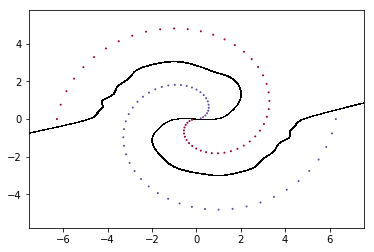

In [56]:
# Frontera de Decisión en el espacio de los datos de entrenamiento

def plot_decision_boundary(pred_func, X, Y, npts = 50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors='k', levels=[0.48, 0.52])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=1)

plot_decision_boundary(lambda x: model.predict(x), X, Y, 100) 
plt.show()